In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import keras
from keras.models import Sequential, load_model
from plot_conf import *

In [12]:
input_data = np.array(np.load('./charge.npy'))[0:10000]/100
output_data = np.load('./truevals.npy')[0:10000]

In [13]:
tvt_ratio=[10,2,1] ##ratio of test validation and test dataset
data_len = len(input_data)
test_end = int(float(tvt_ratio[0])/np.sum(tvt_ratio)*data_len)
valid_end = int(float(tvt_ratio[1])/np.sum(tvt_ratio)*data_len)+test_end
print 'Range of training dataset {}:{}'.format(0,test_end)
print 'Range of validation dataset {}:{}'.format(test_end+1,valid_end)
print 'Range of test dataset {}:{}'.format(valid_end+1,data_len)

Range of training dataset 0:7692
Range of validation dataset 7693:9230
Range of test dataset 9231:10000


In [14]:
test  = input_data[valid_end+1:data_len-1]
test_out = np.log10(np.concatenate(output_data[valid_end+1:data_len-1, 0:1]))

In [15]:
estimator = load_model('./train_hist/model.h5')

In [16]:
res = estimator.predict(np.expand_dims(test, axis=4), verbose=1)

768/768 [==============================] - 24s    


In [21]:
plot_data = np.load('./train_hist/model.h5.npy')

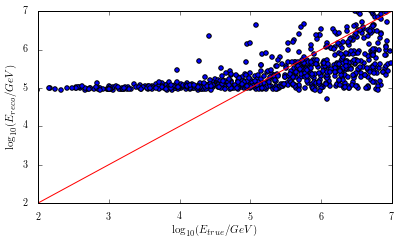

In [25]:
fig, ax= newfig(0.9)
ax.scatter(plot_data[1], plot_data[0])
ax.plot(np.linspace(2,7,10), np.linspace(2,7,10),color='red')
ax.set_xlabel(r'$\log_{10}(E_{true}/GeV)$')
ax.set_ylabel(r'$\log_{10}(E_{reco}/GeV)$')
ax.set_xlim(2,7)
ax.set_ylim(2,7)
plt.savefig('time_conv3d_2dense.pdf')
plt.show()

/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/numpy/ma/core.py:3900: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")
/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages/matplotlib/figure.py:1653: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


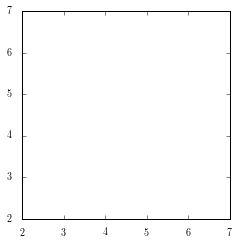

In [9]:

H, xedges, yedges = np.histogram2d(test_out, np.squeeze(res), bins=(np.linspace(2,7,10), np.linspace(2,7,10)))
H = H.T  # Let each row list bins with common y range.
H=[np.array(i)/np.sum(i) for i in H]
fig, ax = newfig(0.9)
plt.imshow(H, interpolation='nearest', origin='low',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

